<a href="https://colab.research.google.com/github/erzdwin/Talento_Tech_IA/blob/main/Taller_Reg_Clasificaci%C3%B3n_Fish.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# librerias necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import linear_model
import sklearn.metrics as metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Datasets/Copia de Fish.csv")
print("Dimensiones del dataset :", df.shape)
df.head()

Dimensiones del dataset : (159, 7)


,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [ ]:
# Preprocesando el dataset, vamos a cambiar los nombres para entender mejor las longitudes medidas de los peces
fish = df.rename(columns={'Length1':'VerticalLen','Length2':'DiagonalLen','Length3':'CrossLen'})
fish.sample(5) # Display random 5 records

,Species,Weight,VerticalLen,DiagonalLen,CrossLen,Height,Width
99,Perch,180.0,23.0,25.0,26.5,6.4395,3.6835
124,Perch,1000.0,39.8,43.0,45.2,11.9328,7.2772
96,Perch,225.0,22.0,24.0,25.5,7.2930,3.7230
11,Bream,500.0,28.7,31.0,36.2,14.3714,4.8146
62,Parkki,60.0,14.3,15.5,17.4,6.5772,2.3142


In [ ]:
fish.describe()

,Weight,VerticalLen,DiagonalLen,CrossLen,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


Correlación de las variables

Text(0.5, 1.0, 'Correlation Matrix')

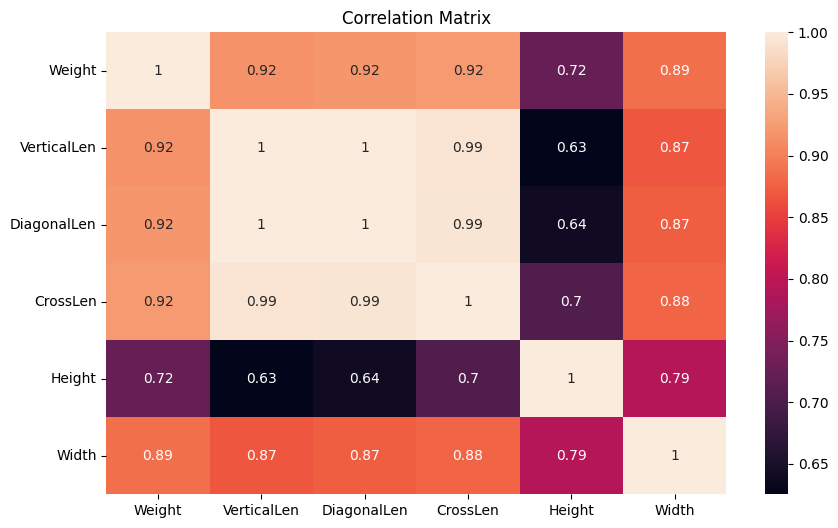

In [ ]:
fish2 = fish.drop("Species", axis=1)
plt.rcParams["figure.figsize"] = (10,6)
sns.heatmap(fish2.corr(), annot =True)
plt.title('Correlation Matrix')


Quitar Variables más correlacionadas

In [ ]:
fish3 = fish.drop(["DiagonalLen", "CrossLen"], axis=1)
fish3.head()

,Species,Weight,VerticalLen,Height,Width
0,Bream,242.0,23.2,11.5200,4.0200
1,Bream,290.0,24.0,12.4800,4.3056
2,Bream,340.0,23.9,12.3778,4.6961
3,Bream,363.0,26.3,12.7300,4.4555
4,Bream,430.0,26.5,12.4440,5.1340


Visualizar datos

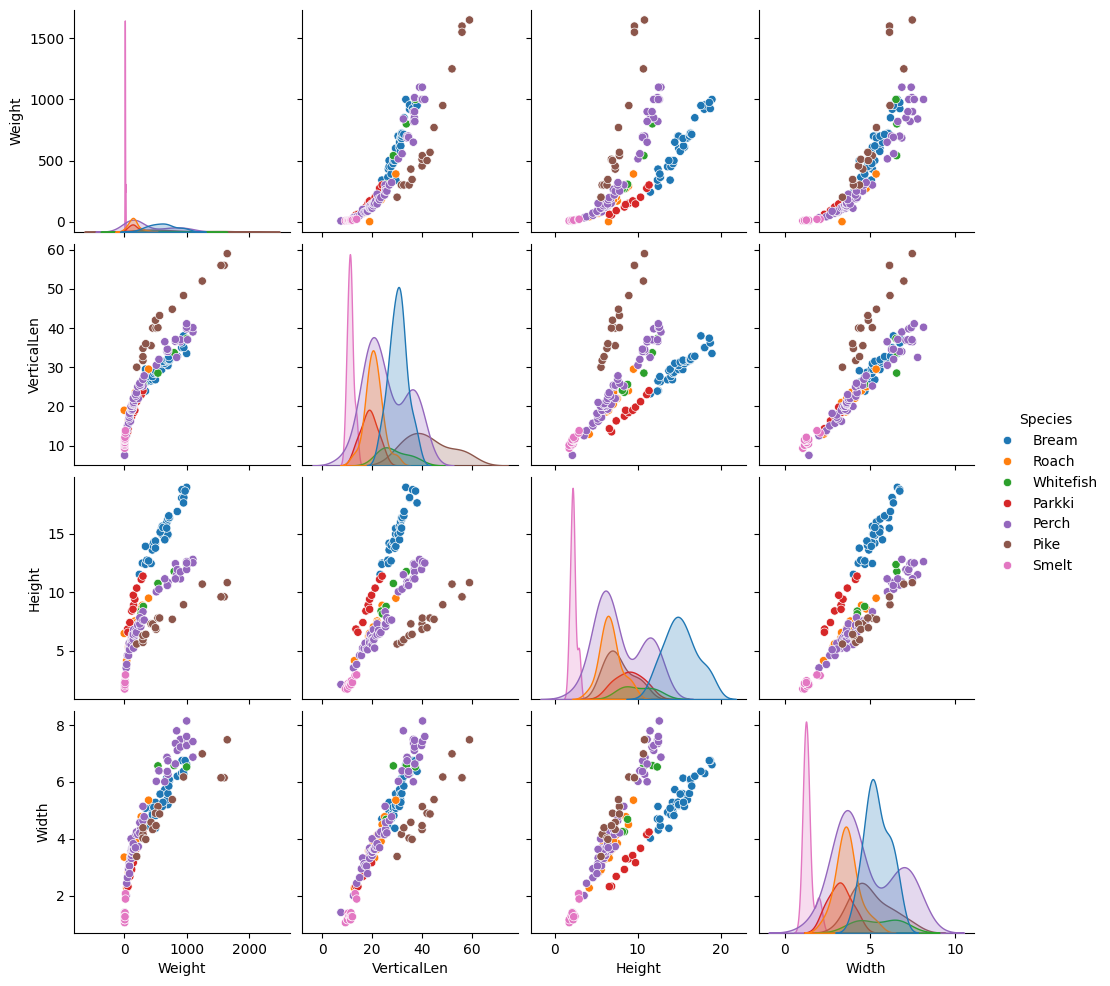

In [ ]:
sns.pairplot(fish3, kind= "scatter", hue="Species")

Revisar si hay datos nulos

In [ ]:
fish3.isna().sum()

,0
Species,0
Weight,0
VerticalLen,0
Height,0
Width,0


Eliminar casos imposibles con la lógica del datase

In [ ]:
fish3[fish3["Weight"] == 0]

,Species,Weight,VerticalLen,Height,Width
40,Roach,0.0,19.0,6.4752,3.3516


In [ ]:
fish3.drop([40])

,Species,Weight,VerticalLen,Height,Width
0,Bream,242.0,23.2,11.5200,4.0200
1,Bream,290.0,24.0,12.4800,4.3056
2,Bream,340.0,23.9,12.3778,4.6961
3,Bream,363.0,26.3,12.7300,4.4555
4,Bream,430.0,26.5,12.4440,5.1340
...,...,...,...,...,...
154,Smelt,12.2,11.5,2.0904,1.3936
155,Smelt,13.4,11.7,2.4300,1.2690
156,Smelt,12.2,12.1,2.2770,1.2558
157,Smelt,19.7,13.2,2.8728,2.0672


De valor categorico a valor numerico

In [ ]:
especies_codificadas = pd.get_dummies(fish3.Species)
especies_codificadas.head()

,Bream,Parkki,Perch,Pike,Roach,Smelt,Whitefish
0,True,False,False,False,False,False,False
1,True,False,False,False,False,False,False
2,True,False,False,False,False,False,False
3,True,False,False,False,False,False,False
4,True,False,False,False,False,False,False


Crear un dataframe que contenga toda la información

In [ ]:
fish4 = pd.concat([fish3, especies_codificadas], axis="columns")
fish4.head()
# como ya tenemos los nombres codificados, podemos deshacernos de la columna con los nombres y tambien la columna Whitefish
# que no nos sirve para el ejercicio, a Whitefish lo eliminamos porque solo hay 6 muestras, que son insuficientes para el ejercicio de entrenamiento de un modelo.
fish5 = fish4.drop(["Species", "Whitefish"], axis="columns")
fish5.head()

,Weight,VerticalLen,Height,Width,Bream,Parkki,Perch,Pike,Roach,Smelt
0,242.0,23.2,11.5200,4.0200,True,False,False,False,False,False
1,290.0,24.0,12.4800,4.3056,True,False,False,False,False,False
2,340.0,23.9,12.3778,4.6961,True,False,False,False,False,False
3,363.0,26.3,12.7300,4.4555,True,False,False,False,False,False
4,430.0,26.5,12.4440,5.1340,True,False,False,False,False,False


Crear un modelo de regresió

In [ ]:
# X tendrá los datos de entrenamiento
X = fish5[["Height", "Width", "VerticalLen", "Bream", "Parkki", "Pike", "Roach", "Smelt"]]
y = fish5[["Weight"]]
# particionando
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
# validando los resultados
print("Tamaño de X_train=", X_train.shape)
print("Tamaño de X_test=", X_test.shape)
print("Tamaño de y_train=", y_train.shape)
print("Tamaño de y_test=", y_test.shape)

Tamaño de X_train= (127, 8)
Tamaño de X_test= (32, 8)
Tamaño de y_train= (127, 1)
Tamaño de y_test= (32, 1)


In [ ]:
def polynomial_plot(feature, label):
    # Crear un array de una dimensión para reducir el arreglo de dos dimensiones a una.
    x_coordinates = feature
    y_coordinates = np.squeeze(label)

    # polinomio de primer grado (recta)
    linear_func = np.poly1d(np.polyfit(x_coordinates, y_coordinates, 1))
    # polinomio de segundo grado (curva parabólica)
    quadratic_func = np.poly1d(np.polyfit(x_coordinates, y_coordinates, 2))


    # Generar valores para visualizar los datos
    values = np.linspace(x_coordinates.min(), x_coordinates.max(), len(x_coordinates))

    plt.scatter(x_coordinates,y_coordinates, color='blue')
    plt.plot(values, linear_func(values), color='cyan', linestyle='dashed', label='Modelo lineal')
    plt.plot(values, quadratic_func(values), color='red', label='Polinomio cuadrático')
    plt.xlabel('Datos de test de %s '%(feature.name))
    plt.ylabel('Peso del pez')
    plt.rcParams["figure.figsize"] = (10,6) # Custom figure size in inches
    plt.legend()
    plt.title("Comparacion de funciones lineales y cuadráticas para la característica %s" % (feature.name))
    plt.show()

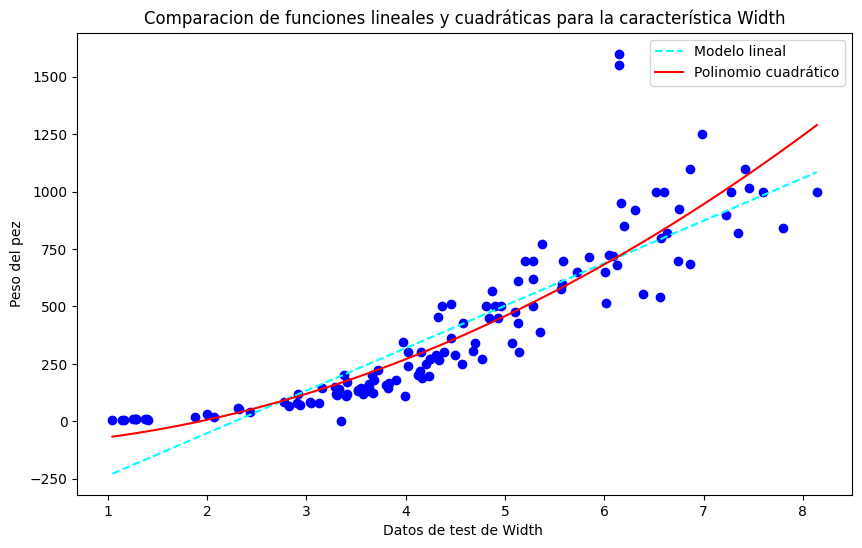

In [ ]:
polynomial_plot(X_train.Width, y_train) # comparando modelos para el ancho y el peso del pez

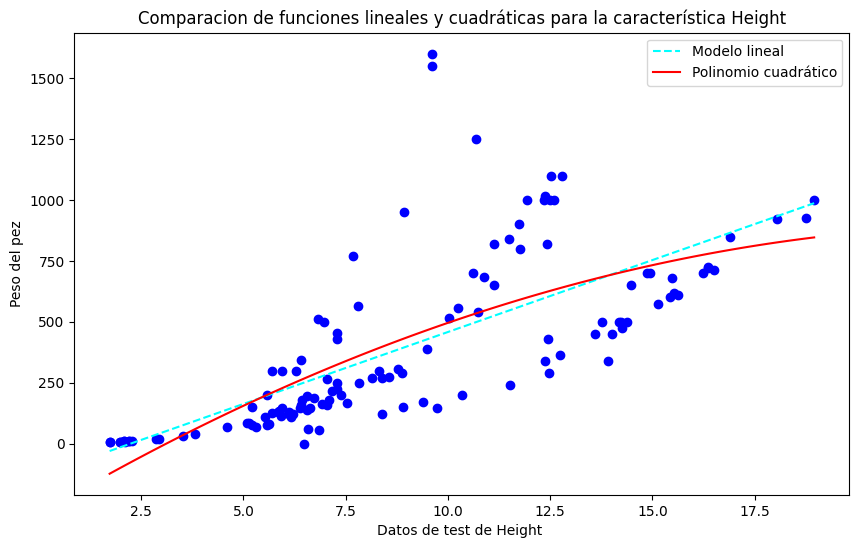

In [ ]:
polynomial_plot(X_train.Height, y_train) # comparando modelos para el alto y el peso del pez

Polinomios de Orden Superior

In [ ]:
def polynomial_plot(feature, label, degree=2):

    x_coordinates = feature
    y_coordinates = np.squeeze(label)

    # Polinomio de grado especificado
    polynomial_func = np.poly1d(np.polyfit(x_coordinates, y_coordinates, degree))

    values = np.linspace(x_coordinates.min(), x_coordinates.max(), len(x_coordinates))

    plt.scatter(x_coordinates, y_coordinates, color='blue')
    plt.plot(values, polynomial_func(values), color='red', label='Polinomio de grado %d' % degree)  # Etiqueta actualizada
    plt.xlabel('Datos de test de %s' % feature.name)
    plt.ylabel('Peso del pez')
    plt.rcParams["figure.figsize"] = (10, 6)
    plt.legend()
    plt.title("Función polinómica para la característica %s" % feature.name)  # Título actualizado
    plt.show()

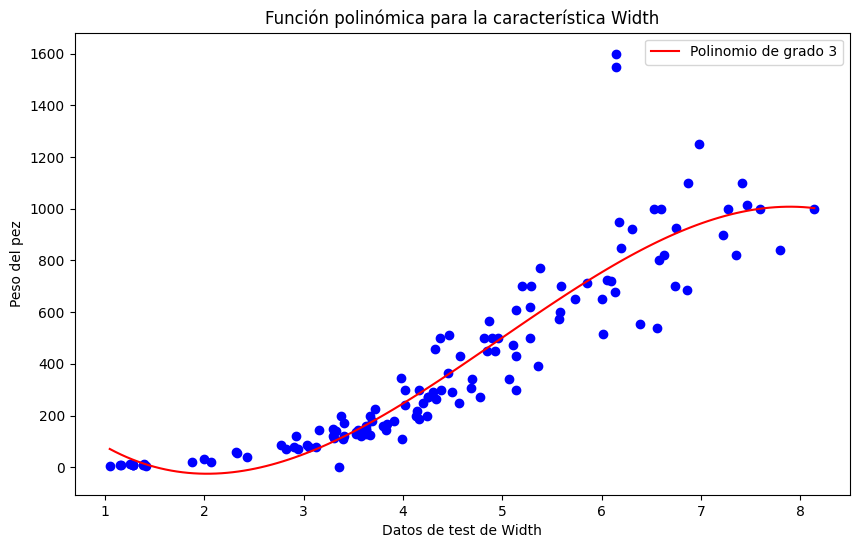

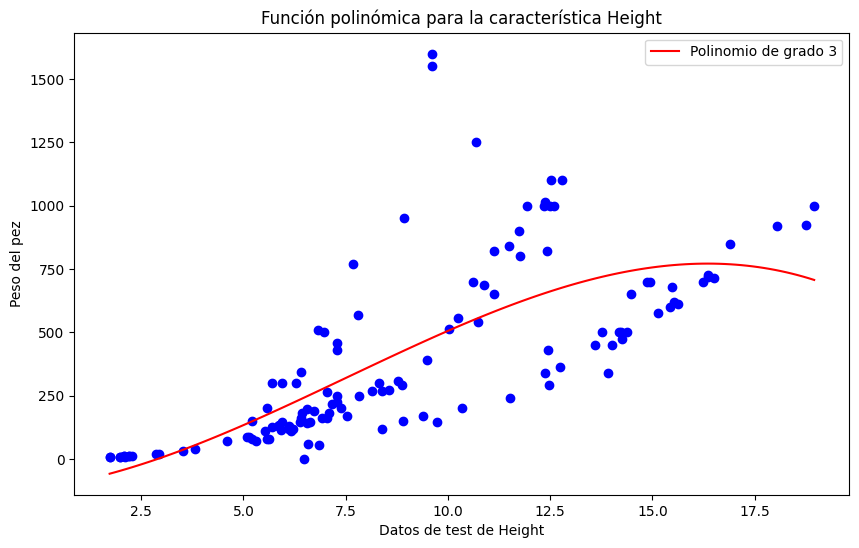

In [ ]:
# Graficar un polinomio de grado 3 para la característica "Width"
polynomial_plot(X_train.Width, y_train, degree=3)

# Graficar un polinomio de grado 4 para la característica "Height"
polynomial_plot(X_train.Height, y_train, degree=3)

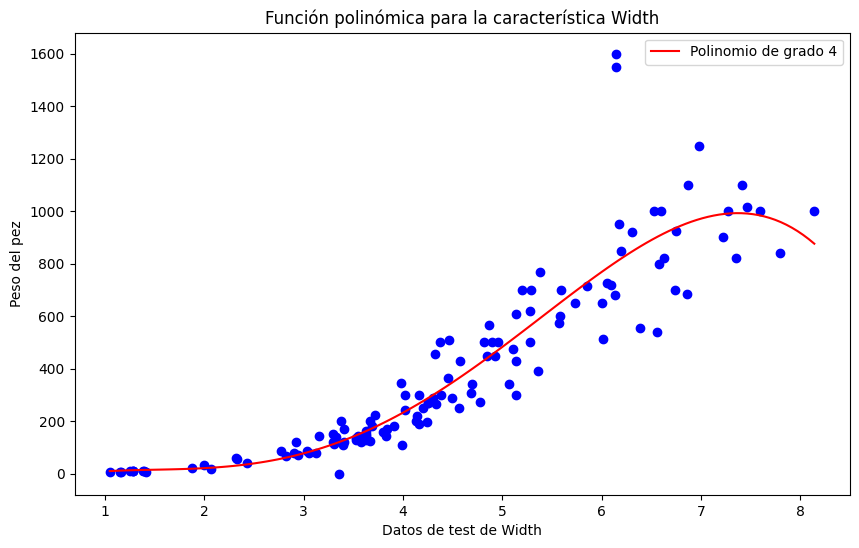

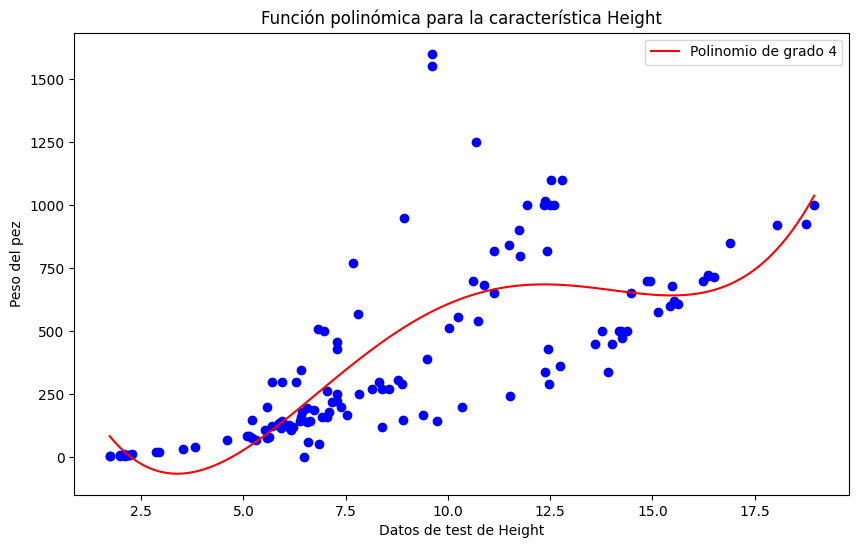

In [ ]:
# Graficar un polinomio de grado 3 para la característica "Width"
polynomial_plot(X_train.Width, y_train, degree=4)

# Graficar un polinomio de grado 4 para la característica "Height"
polynomial_plot(X_train.Height, y_train, degree=4)

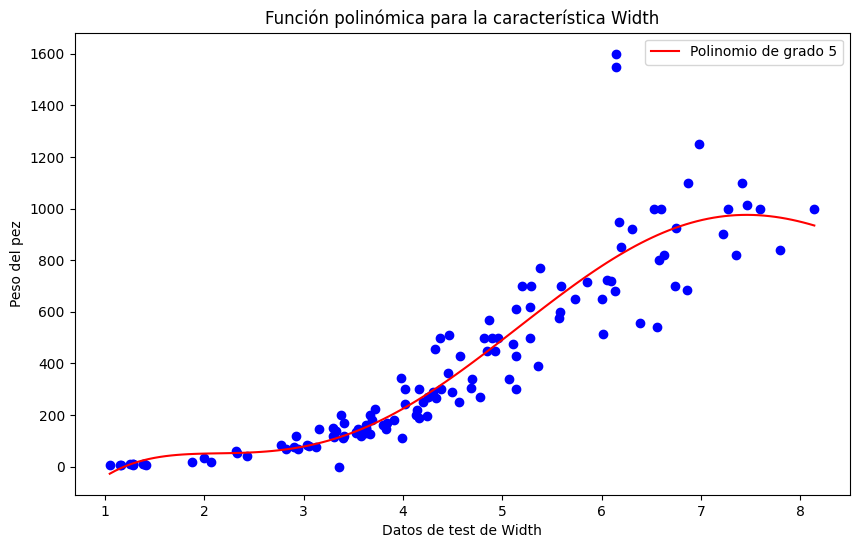

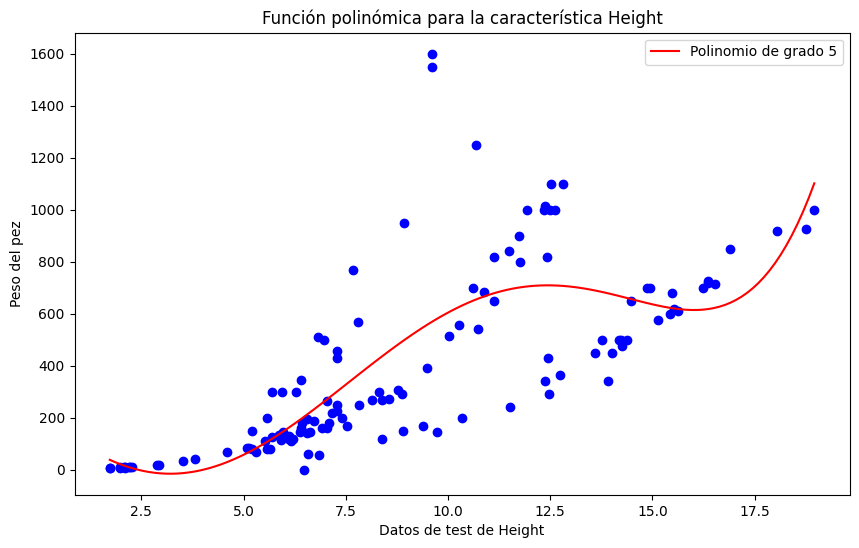

In [ ]:
# Graficar un polinomio de grado 3 para la característica "Width"
polynomial_plot(X_train.Width, y_train, degree=5)

# Graficar un polinomio de grado 4 para la característica "Height"
polynomial_plot(X_train.Height, y_train, degree=5)

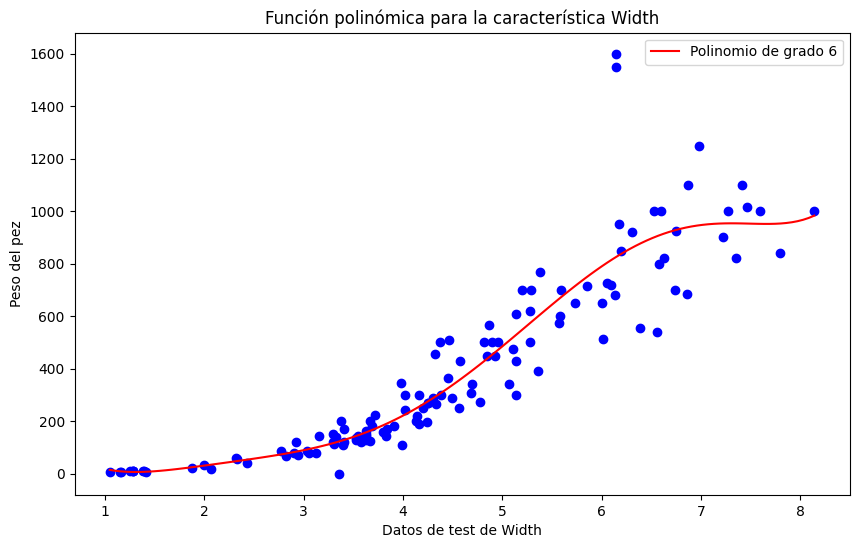

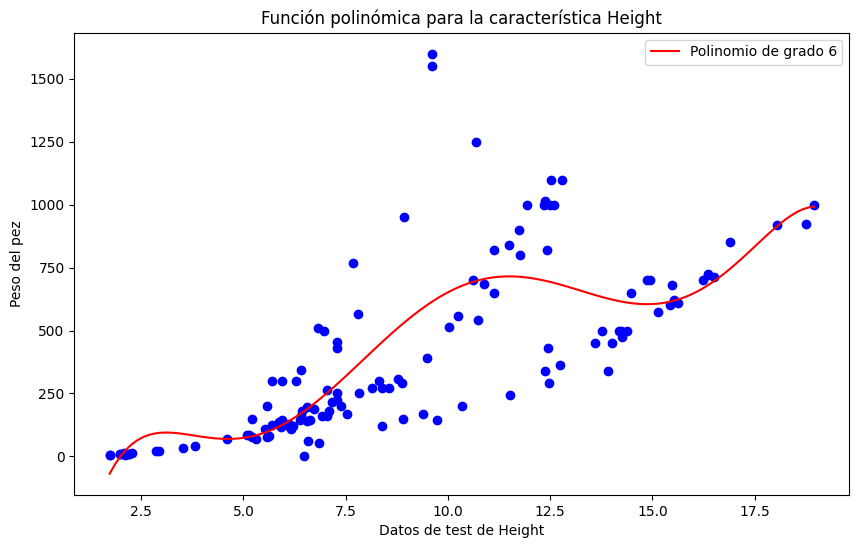

In [ ]:
# Graficar un polinomio de grado 3 para la característica "Width"
polynomial_plot(X_train.Width, y_train, degree=6)

# Graficar un polinomio de grado 4 para la característica "Height"
polynomial_plot(X_train.Height, y_train, degree=6)

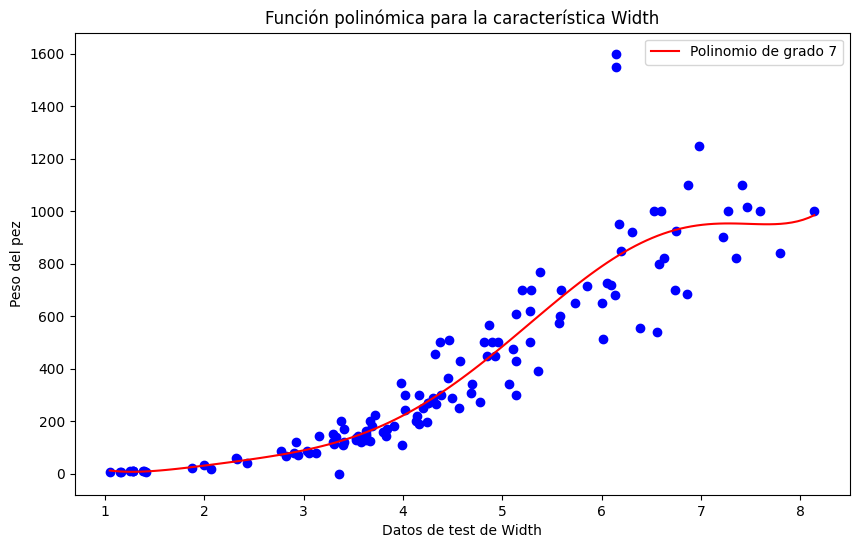

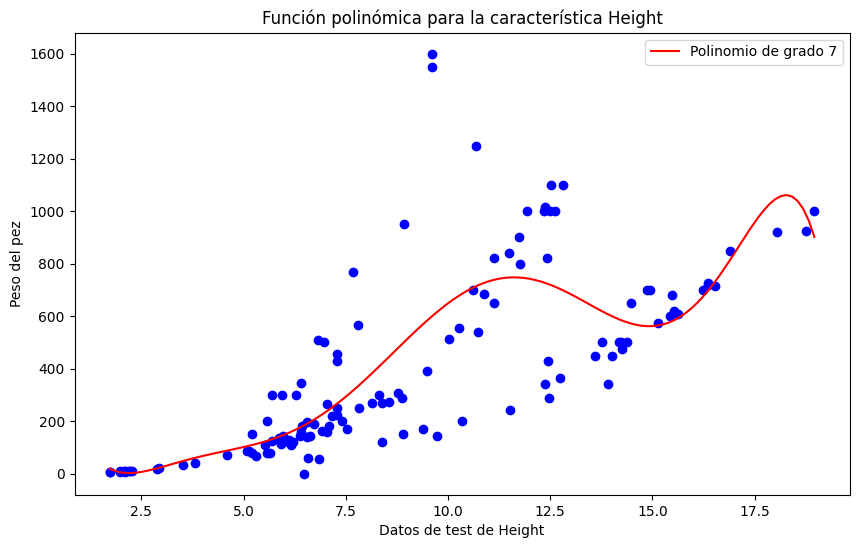

In [ ]:
# Graficar un polinomio de grado 3 para la característica "Width"
polynomial_plot(X_train.Width, y_train, degree=7)

# Graficar un polinomio de grado 4 para la característica "Height"
polynomial_plot(X_train.Height, y_train, degree=7)

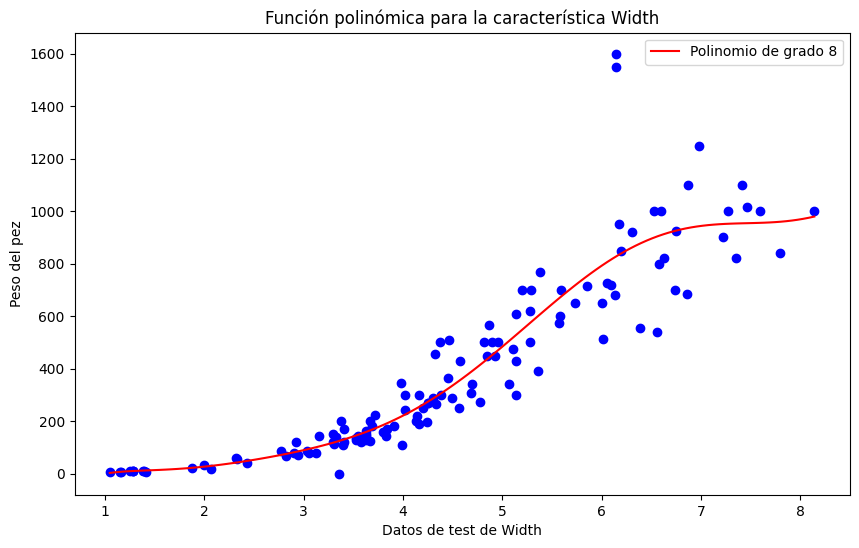

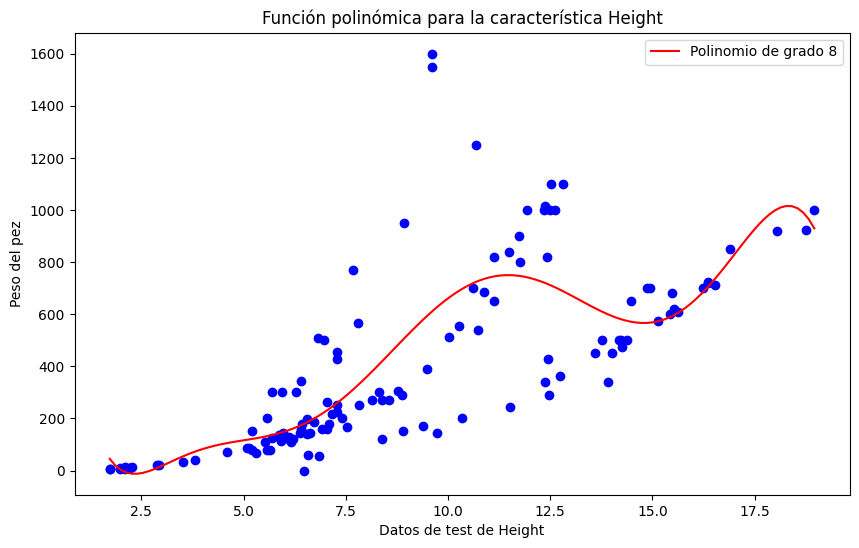

In [ ]:
# Graficar un polinomio de grado 3 para la característica "Width"
polynomial_plot(X_train.Width, y_train, degree=8)

# Graficar un polinomio de grado 4 para la característica "Height"
polynomial_plot(X_train.Height, y_train, degree=8)

Análisis: Para la característica Width (ancho) un polinomio de grado 3 o 4 ofrece un buen ajuste a los datos, lo polinomios de grado superiro empiezan a mostrar un sobre ajuste. Para la característica Heigth (alto) el polinomio de grado 3 es el mas adecuado, grados superiores se desajustan. En el caso de grados más bajos como se menciona en el Notebook el modelo lineal no es el indicado y el cuadratico es un poco simple.

Regresión polinómica utilizando Sklearn

In [ ]:
poly = PolynomialFeatures(degree = 3) #con grado 3
X_poly = poly.fit_transform(X_train)
poly.fit(X_poly, y_train)

lm = linear_model.LinearRegression()
lm.fit(X_poly, y_train)

predictions = lm.predict(poly.fit_transform(X_test))
print('r2_score= ', metrics.r2_score(y_test, predictions))

r2_score=  0.9389772722500765


In [ ]:
predictedWeight = pd.DataFrame(predictions, columns=['Predicted Weight']) # Create new dataframe of column'Predicted Weight'
actualWeight = pd.DataFrame(y_test)
actualWeight = actualWeight.reset_index(drop=True) # Drop the index so that we can concat it, to create new dataframe
df_actual_vs_predicted = pd.concat([actualWeight,predictedWeight],axis =1)
df_actual_vs_predicted.T

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
Weight,700.000000,9.900000,273.000000,120.00000,950.000000,90.000000,150.000000,955.000000,975.000000,100.000000,...,51.50000,690.000000,150.000000,600.000000,260.000000,300.000000,685.000000,850.000000,130.000000,300.000000
Predicted Weight,723.225275,-6.245645,245.515271,127.74706,857.469606,68.571507,141.850075,893.723554,964.531666,30.499261,...,42.50275,694.173749,148.021121,569.724698,241.336933,286.356036,682.844451,897.398727,109.822296,231.267809


Text(0.5, 1.0, 'Comparación del peso generado por el modelo y las etiquetas')

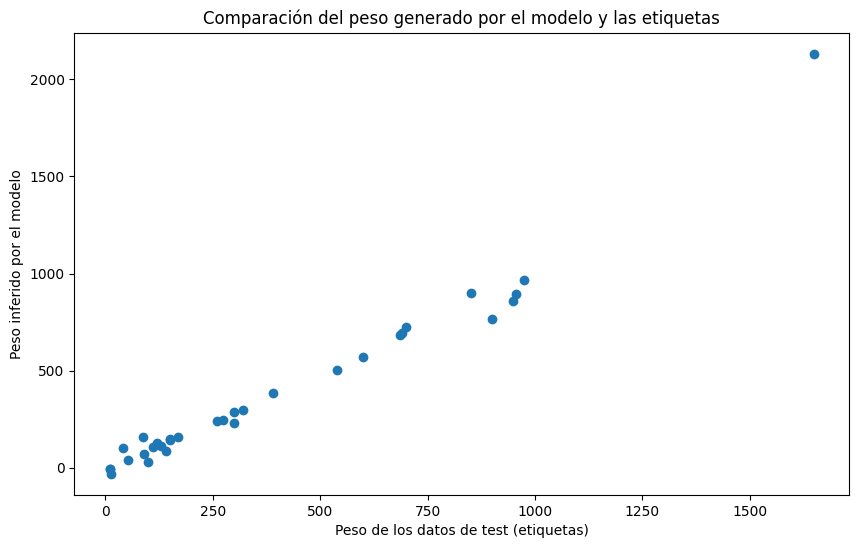

In [ ]:
plt.scatter(y_test, predictions)
plt.xlabel('Peso de los datos de test (etiquetas)')
plt.ylabel('Peso inferido por el modelo')
plt.rcParams["figure.figsize"] = (10,6) # Custom figure size in inches
plt.title("Comparación del peso generado por el modelo y las etiquetas")

Evaluando el modelo con un histograma que grafique la diferencia entre y_test y las predicciones del modelo

Text(0.5, 1.0, 'histograma de las diferencias')

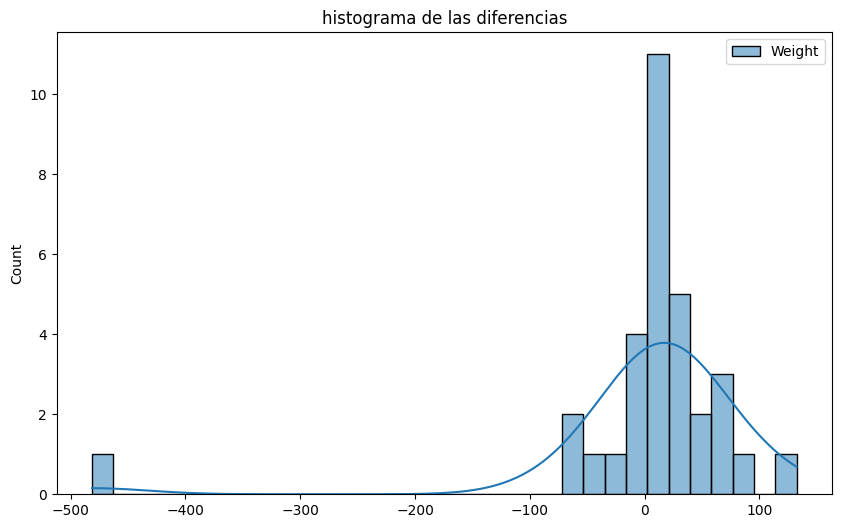

In [ ]:
sns.histplot(y_test-predictions, kde=True)
plt.rcParams["figure.figsize"] = (10,6) # Custom figure size in inches
plt.title("histograma de las diferencias")

Conclusiones

El modelo de regresión polinómica con un grado de 3 predice eficazmente el peso del pez en función de las características dadas. El modelo demuestra una buena precisión y capacidades de generalización, lo que sugiere su idoneidad para esta tarea

El modelo utiliza regresión polinómica con un grado de 3, que se determinó como el mejor ajuste para los datos.
El valor R-cuadrado (r2_score) es una medida de qué tan bien se ajusta el modelo a los datos. Se obtuvo un valor R-cuadrado alto, lo que indica un buen ajuste.
El diagrama de dispersión que compara los pesos reales frente a los predichos muestra una fuerte correlación, lo que respalda aún más la precisión del modelo.
El histograma de diferencias entre los pesos reales y los predichos se centra alrededor de cero, lo que sugiere que los errores se distribuyen normalmente sin un sesgo significativo.

##Modelos de clasificación

In [ ]:
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


Revisar cuantos valores hay por cada especie

([<matplotlib.patches.Wedge at 0x7e6bd9e2ab90>,
 [Text(0.4925997893879059, 0.9835372120540183, 'Perch'),
  Text(-1.0692251924802005, 0.25837470419078984, 'Bream'),
  Text(-0.7263011784050116, -0.8261274709434928, 'Roach'),
  Text(0.010866933463401687, -1.0999463213071363, 'Pike'),
  Text(0.6412773934759526, -0.8937355898791814, 'Smelt'),
  Text(0.9883556249116893, -0.4828593570652063, 'Parkki'),
  Text(1.092279199294596, -0.1301005410763399, 'Whitefish')],
 [Text(0.268690794211585, 0.5364748429385554, '35'),
  Text(-0.5832137413528367, 0.1409316568313399, '22'),
  Text(-0.39616427913000635, -0.45061498415099605, '13'),
  Text(0.005927418252764556, -0.5999707207129834, '11'),
  Text(0.3497876691687014, -0.4874921399340989, ' 9'),
  Text(0.5391030681336486, -0.2633778311264761, ' 7'),
  Text(0.5957886541606886, -0.07096393149618539, ' 4')])

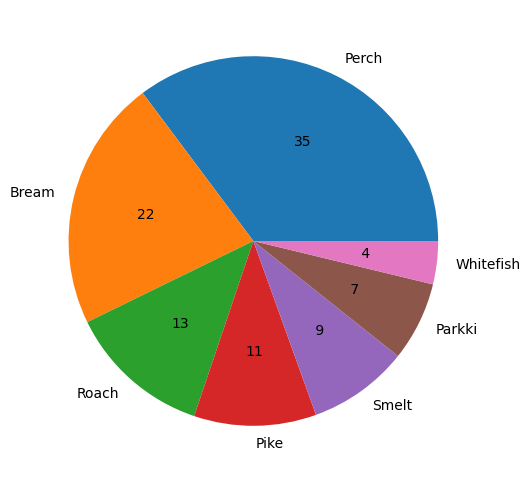

In [ ]:
counts = df["Species"].value_counts()
plt.pie(counts, labels=list(counts.index), autopct="%2.f" )

In [ ]:
especies_eliminar = ["Whitefish", "Parkki", "Smelt", "Pike"]
fs2 = df.copy()
for especie in especies_eliminar:
    fs2 = fs2.drop(df[df["Species"] == especie].index)

fs2["Species"].unique()

array(['Bream', 'Roach', 'Perch'], dtype=object)

In [ ]:
knn_clf = KNeighborsClassifier()

Reemplazar los nombres de las categorías por números para el clasificador

In [ ]:
fs3 = fs2.copy()
fs3["Species"] = fs3["Species"].replace({"Bream": 0, "Roach": 1, "Perch": 2})
fs3.head()

<ipython-input-50-46398906aec2>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  fs3["Species"] = fs3["Species"].replace({"Bream": 0, "Roach": 1, "Perch": 2})


,Species,Weight,Length1,Length2,Length3,Height,Width
0,0,242.0,23.2,25.4,30.0,11.5200,4.0200
1,0,290.0,24.0,26.3,31.2,12.4800,4.3056
2,0,340.0,23.9,26.5,31.1,12.3778,4.6961
3,0,363.0,26.3,29.0,33.5,12.7300,4.4555
4,0,430.0,26.5,29.0,34.0,12.4440,5.1340


In [ ]:
y = fs3["Species"]
X = fs3.drop("Species", axis=1)
print(X.shape)
print(y.shape)

(111, 6)
(111,)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(66, 6)
(66,)
(45, 6)
(45,)


Entrenar el Modelo

In [ ]:
knn_clf.fit(X=X_train, y=y_train)

KNeighborsClassifier()

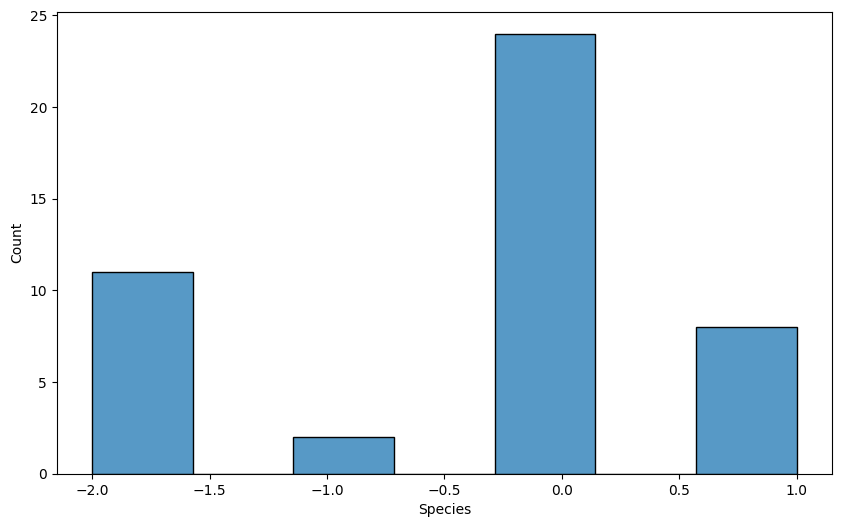

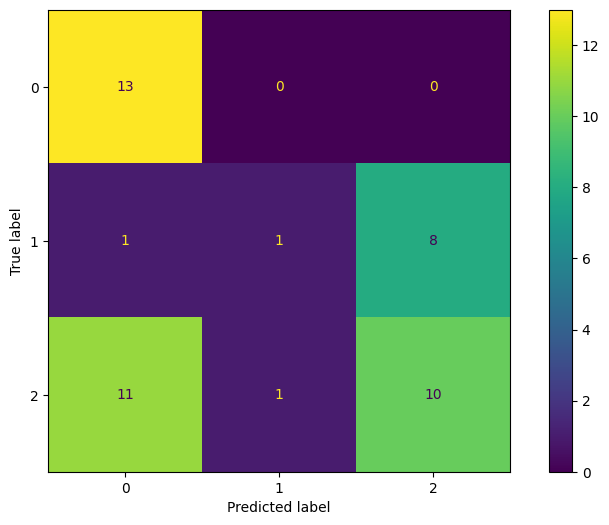

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
predicciones = knn_clf.predict(X_test)
diferencias = predicciones - y_test
sns.histplot(diferencias)
cm = confusion_matrix(y_test, predicciones)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn_clf.classes_)
disp.plot()
plt.show()


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predicciones))

              precision    recall  f1-score   support

           0       0.52      1.00      0.68        13
           1       0.50      0.10      0.17        10
           2       0.56      0.45      0.50        22

    accuracy                           0.53        45
   macro avg       0.53      0.52      0.45        45
weighted avg       0.53      0.53      0.48        45

